# Transfer Learning MNIST

* Train a simple convnet on the MNIST dataset the first 5 digits [0-4].
* Freeze convolutional layers and fine-tune dense layers for the classification of digits [5-9].

## MNIST Dataset
The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students. The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API.

Let's load MNIST dataset

In [0]:
def pro_gress():
    import time
    from progressbar import AnimatedMarker,ProgressBar,Percentage,ETA,FileTransferSpeed,Bar
    widgets = ['Processing: ', Percentage(), ' ',
                  Bar(marker='=',left='|',right='|'),
                  ' ', ETA()]
    pbar = ProgressBar(widgets=widgets, maxval=500)
    for i in range(100,500+1,50):
        time.sleep(0.2)
        pbar.update(i)
    pbar.finish()
    print('Done!!')

In [63]:
%tensorflow_version 2.x
show = pro_gress()
import tensorflow

Processing: 100% |=============================================| Time:  0:00:01


Done!!


In [0]:
# Initialize the random number generator
import random
random.seed(0)

import warnings
warnings.filterwarnings("ignore")

In [65]:
from tensorflow.keras.datasets import mnist
print("Importing Dataset======>>")
show = pro_gress()
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Importing Dataset======>>


Processing: 100% |=============================================| Time:  0:00:01


Done!!


In [66]:
print("Shape of X_train is ==>",X_train.shape)

Shape of X_train is ==> (60000, 28, 28)


In [67]:
print("Shape of X_test is ==>",X_test.shape)

Shape of X_test is ==> (10000, 28, 28)


X_train and X_test contain greyscale RGB codes (from 0 to 255) while y_train and y_test contains labels from 0 to 9 which represents which number they actually are.

Let's visualize some numbers using matplotlib

Plotting the image..!!
Label: 0


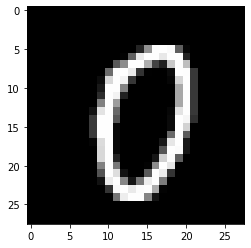

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Plotting the image..!!")
print("Label: {}".format(y_train[1000]))
plt.imshow(X_train[1000],cmap='gray')

## Question 1

### Create two datasets
- First having digits from 0 to 4
- Second having digits from 5 to 9

Hint: use labels to separate data

In [69]:
print("Length of X_train is ==>",len(X_train))

Length of X_train is ==> 60000


In [70]:
import numpy as np
print("Checking the unique values in y_train ==>")
show = pro_gress()
np.unique(y_train)

Checking the unique values in y_train ==>


Processing: 100% |=============================================| Time:  0:00:01


Done!!


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Creating dataset  having digits from range 0-4

In [71]:
show = pro_gress()
X_train_u5 = X_train[y_train<5]
X_test_u5 =X_test[y_test<5]
y_train_u5 = y_train[y_train<5]
y_test_u5 = y_test[y_test<5]

Processing: 100% |=============================================| Time:  0:00:01


Done!!


Plotting figures for assuring the dataset subsetting..


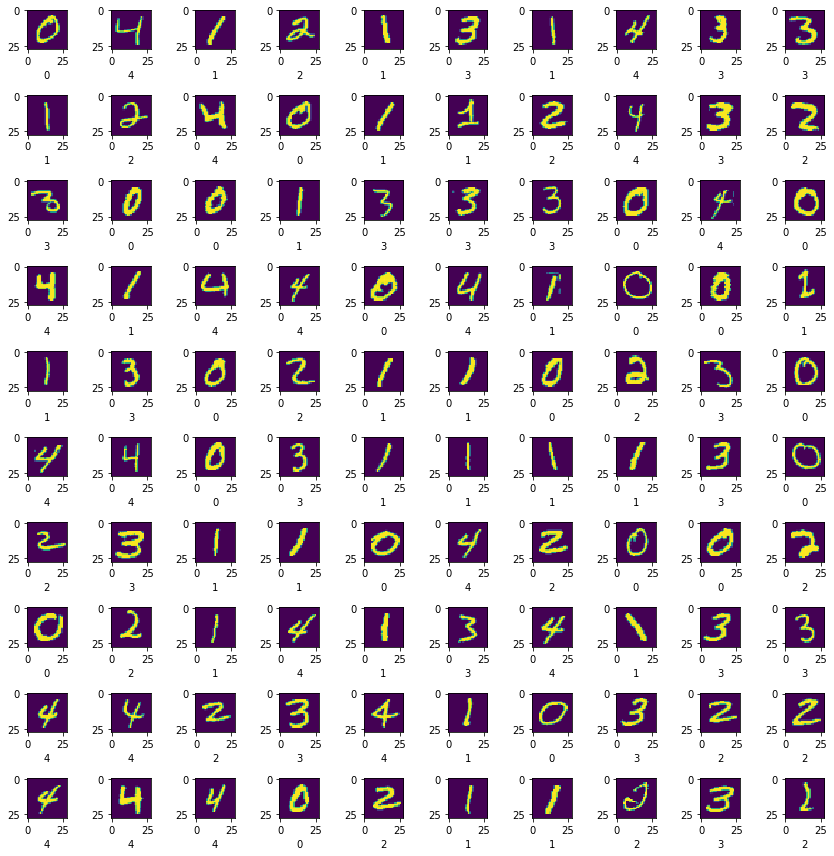

In [72]:
print("Plotting figures for assuring the dataset subsetting..")
plt.figure(figsize=(12,12))
for i in range(0,100):
  plt.subplot(10,10,i+1)
  plt.tight_layout()
  plt.imshow(X_train_u5[i])
  plt.xlabel(y_train_u5[i])
  i += 1

Creating dataset having digits range from 5-9

In [0]:
X_train_a5 = X_train[y_train>=5]
X_test_a5 = X_test[y_test>=5]
y_train_a5 = y_train[y_train>=5]
y_test_a5 = y_test[y_test>=5]

Checking for the other subset..


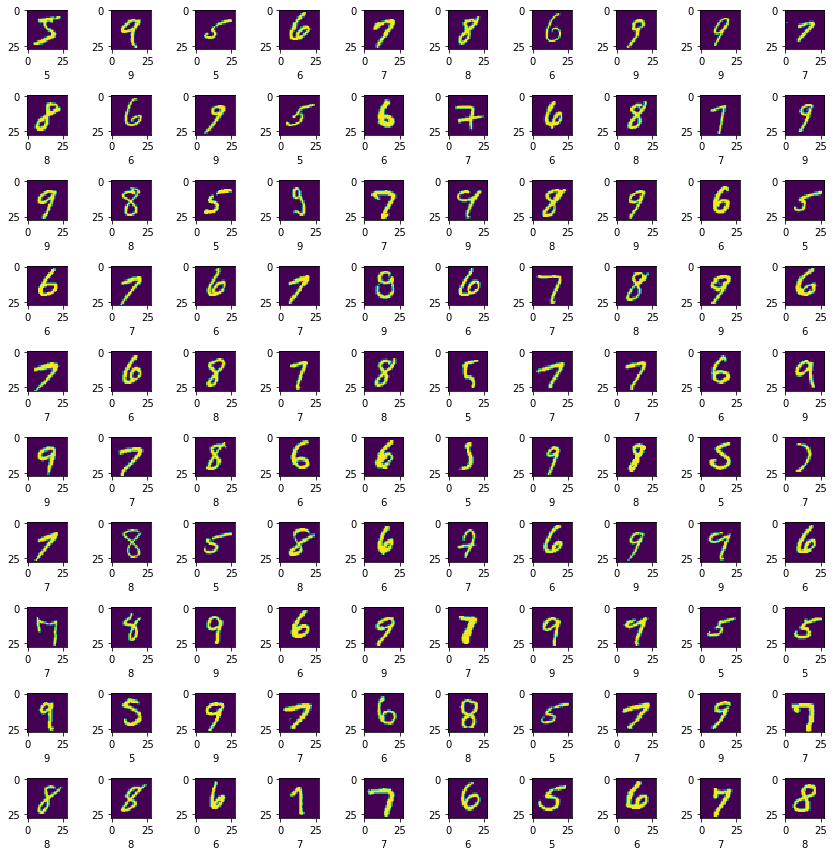

In [74]:
print("Checking for the other subset..")
plt.figure(figsize=(12,12))
for i in range(0,100):
  plt.subplot(10,10,i+1)
  plt.tight_layout()
  plt.imshow(X_train_a5[i])
  plt.xlabel(y_train_a5[i])
  i += 1

## Question 2

### Print shape of the data
- print shape of all variables of both the datasets you created

In [75]:
print("The shape of X_train having digits below 5 is:==>",X_train_u5.shape)
print("The shape of X_test having digits below 5 is:==>",X_test_u5.shape)
print("The shape of y_train having digits below 5 is:==>",y_train_u5.shape)
print("The shape of y_test having digits below 5 is:==>",y_test_u5.shape)
print("The shape of X_train having digits above 5 is:==>",X_train_a5.shape)
print("The shape of X_test having digits above 5 is:==>",X_test_a5.shape)
print("The shape of y_train having digits above 5 is:==>",y_train_a5.shape)
print("The shape of y_test having digits above 5 is:==>",y_test_a5.shape)

The shape of X_train having digits below 5 is:==> (30596, 28, 28)
The shape of X_test having digits below 5 is:==> (5139, 28, 28)
The shape of y_train having digits below 5 is:==> (30596,)
The shape of y_test having digits below 5 is:==> (5139,)
The shape of X_train having digits above 5 is:==> (29404, 28, 28)
The shape of X_test having digits above 5 is:==> (4861, 28, 28)
The shape of y_train having digits above 5 is:==> (29404,)
The shape of y_test having digits above 5 is:==> (4861,)


## Question 3

### Reshape data
- reshape first dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [76]:
print("Reshaping the data..")
show = pro_gress()
x_trial=X_train_u5.reshape(30596,28,28,1)

Reshaping the data..


Processing: 100% |=============================================| Time:  0:00:01


Done!!


In [77]:
print("After reshaping the train data of first dataset==>",x_trial.shape)

After reshaping the train data of first dataset==> (30596, 28, 28, 1)


In [0]:
x_trial_te = X_test_u5.reshape(5139,28,28,1)

In [79]:
print("After reshaping the test data of first dataset==>",x_trial_te.shape)

After reshaping the test data of first dataset==> (5139, 28, 28, 1)


## Question 4

### Normalize data
- normalize first dataset
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [80]:
print("Normalizing the first dataset..")
x_trial = x_trial/255
x_trial_te = x_trial_te/255 
show = pro_gress()

Normalizing the first dataset..


Processing: 100% |=============================================| Time:  0:00:01


Done!!


### Print shape of data and number of images
- for first dataset
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [81]:
print("The shape of X_train having digits below 5 is:==>",x_trial.shape)
print("The number of images in X_train is:==>",x_trial.shape[0])
print("The number of images in X_test is:==>",x_trial_te.shape[0])

The shape of X_train having digits below 5 is:==> (30596, 28, 28, 1)
The number of images in X_train is:==> 30596
The number of images in X_test is:==> 5139


## Question 5

### One-hot encode the class vector
- encode labels of first dataset
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use tensorflow.keras.utils.to_categorical

In [82]:
print("One hot encoding the labels of first dataset :-->")
import tensorflow as tf
y_train_u51 = tf.keras.utils.to_categorical(y_train_u5,num_classes=5)
y_test_u51 = tf.keras.utils.to_categorical(y_test_u5,num_classes=5)
show = pro_gress()

One hot encoding the labels of first dataset :-->


Processing: 100% |=============================================| Time:  0:00:01


Done!!


## Question 6
We will build our model by using Keras.

### Initialize a sequential model
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- add a max pooling layer of size 2x2
- add a dropout layer
    - dropout layers fight with the overfitting by disregarding some of the neurons while training
    - use dropout rate 0.2

In [83]:
print("Building the model..")
from tensorflow.keras import models,layers
model = models.Sequential()
model.add(layers.Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))

Building the model..


## Question 7

### Add classification layers
- do this after doing question 6
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes
- you can add a dropout layer in between, if necessary

In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(5,activation='softmax'))

## Question 8

### Compile and fit the model
- compile your model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "sgd"
- fit your model
    - give train data - features and labels
    - batch size: 128
    - epochs: 10
    - give validation data - features and labels

In [0]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [86]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               4718720   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                

In [87]:
model.fit(x_trial,y_train_u51,batch_size=128,epochs=10,validation_data=(x_trial_te,y_test_u51))

Train on 30596 samples, validate on 5139 samples
Epoch 1/10
30596/30596 [==============================] - 2s 77us/sample - loss: 0.1421 - accuracy: 0.9557 - val_loss: 0.4098 - val_accuracy: 0.9821
Epoch 2/10
30596/30596 [==============================] - 2s 59us/sample - loss: 0.0559 - accuracy: 0.9831 - val_loss: 0.0537 - val_accuracy: 0.9916
Epoch 3/10
30596/30596 [==============================] - 2s 59us/sample - loss: 0.0368 - accuracy: 0.9891 - val_loss: 0.0239 - val_accuracy: 0.9916
Epoch 4/10
30596/30596 [==============================] - 2s 61us/sample - loss: 0.0295 - accuracy: 0.9913 - val_loss: 0.0168 - val_accuracy: 0.9940
Epoch 5/10
30596/30596 [==============================] - 2s 60us/sample - loss: 0.0222 - accuracy: 0.9936 - val_loss: 0.0149 - val_accuracy: 0.9947
Epoch 6/10
30596/30596 [==============================] - 2s 59us/sample - loss: 0.0188 - accuracy: 0.9949 - val_loss: 0.0124 - val_accuracy: 0.9953
Epoch 7/10
30596/30596 [==============================] -

## Question 9

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [88]:
print("Getting y_pred to get accuracy..")
y_pred = model.predict(x_trial_te)

Getting y_pred to get accuracy..


In [89]:
import numpy as np
out = []
for i in y_pred:
  out.append(np.argmax(i))
print(out)

[2, 1, 0, 4, 1, 4, 0, 0, 1, 3, 4, 4, 0, 4, 0, 1, 3, 1, 3, 4, 2, 1, 2, 1, 1, 4, 2, 3, 1, 2, 4, 4, 3, 0, 4, 1, 3, 4, 4, 3, 0, 0, 2, 1, 3, 2, 2, 4, 3, 1, 3, 3, 1, 4, 1, 0, 4, 2, 1, 4, 3, 4, 4, 4, 2, 4, 0, 1, 0, 1, 4, 3, 1, 1, 2, 0, 2, 1, 0, 3, 4, 4, 4, 4, 1, 4, 4, 2, 3, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 3, 1, 4, 2, 3, 1, 1, 1, 3, 2, 4, 3, 0, 3, 2, 2, 1, 2, 4, 1, 3, 3, 2, 2, 4, 1, 2, 3, 0, 4, 4, 2, 4, 1, 2, 2, 1, 1, 0, 3, 0, 1, 4, 1, 2, 1, 2, 2, 4, 1, 2, 2, 0, 4, 0, 0, 2, 4, 1, 2, 4, 0, 2, 4, 3, 3, 0, 0, 3, 1, 2, 2, 3, 0, 4, 2, 0, 1, 1, 2, 1, 3, 3, 1, 3, 1, 0, 1, 3, 1, 1, 1, 4, 2, 2, 0, 3, 2, 0, 4, 1, 1, 4, 0, 3, 3, 1, 2, 1, 2, 1, 2, 4, 4, 2, 3, 2, 4, 0, 3, 1, 1, 2, 1, 4, 2, 2, 0, 4, 1, 4, 1, 4, 3, 0, 0, 3, 0, 2, 4, 3, 3, 3, 2, 3, 1, 2, 0, 3, 2, 1, 4, 1, 2, 1, 4, 0, 1, 0, 2, 3, 4, 0, 3, 2, 1, 3, 1, 3, 4, 2, 2, 3, 2, 4, 1, 3, 0, 3, 3, 1, 3, 4, 4, 4, 2, 1, 2, 4, 4, 0, 0, 2, 3, 2, 0, 4, 4, 0, 0, 4, 0, 3, 4, 3, 3, 3, 3, 3, 0, 2, 1, 0, 4, 3, 0, 3, 0, 0, 2, 4, 0, 2, 2, 3, 1, 1, 0, 4, 2, 3, 2, 

In [90]:
from sklearn.metrics import accuracy_score,classification_report
acc = accuracy_score(y_test_u5,out)
report=classification_report(y_test_u5,out)
print("This is the obtained accuracy {}%".format(acc*100))
print("This is the report with the detailed scoring of F1 scores,precision & accuracy:-")
print(report)

This is the obtained accuracy 99.66919634170071%
This is the report with the detailed scoring of F1 scores,precision & accuracy:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      1.00      1010
           4       1.00      1.00      1.00       982

    accuracy                           1.00      5139
   macro avg       1.00      1.00      1.00      5139
weighted avg       1.00      1.00      1.00      5139



## Question 10

## Transfer learning
Now we will apply this model on second dataset (5-9 digits)

- fix the first convolution layers so that the weights in the convolution layers dont get updated in the process of training
- get the second dataset
- train the last 2 dense layers
- predict the accuracy and loss

### Make only dense layers trainable
- set trainalble = False for all layers other than Dense layers

In [91]:
print("The no. of layers in the model ==>",len(model.layers))

The no. of layers in the model ==> 7


In [92]:
print("Checking the layers since the Conv layers has to be freezed")
model.layers[:3]

Checking the layers since the Conv layers has to be freezed


In [93]:
print("Freezing the model..")
for layer in model.layers[:3]:
  layer.trainable = False
show = pro_gress()  

Freezing the model..


Processing: 100% |=============================================| Time:  0:00:01


Done!!


### Modify data
- in your second data, class labels will start from 5 to 9 but for keras.utils.to_categorical the labels should start from 0
- so you need to subtract 5 from train and test labels

In [94]:
print("Since the requirement of the keras .to_categorical function is that the value should start from 0 , so converting the values..")
y_train_a52 = y_train_a5 - 5
y_test_a52 = y_test_a5 - 5
show = pro_gress()
print("Checking the values present in the labels now==>", np.unique(y_test_a52))

Since the requirement of the keras .to_categorical function is that the value should start from 0 , so converting the values..


Processing: 100% |=============================================| Time:  0:00:01


Done!!
Checking the values present in the labels now==> [0 1 2 3 4]


### Reshape data
- reshape second dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [95]:
print("Checking the second dataset..")
x_tr1 = X_train_a5.reshape(29404,28,28,1)
x_tes1 = X_test_a5.reshape(4861,28,28,1)
show = pro_gress()

Checking the second dataset..


Processing: 100% |=============================================| Time:  0:00:01


Done!!


### Normalize data
- normalize second data
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [96]:
print("Normalizing the second dataset..")
x_tr1 = x_tr1/255
x_tes1 = x_tes1/255
show = pro_gress()

Normalizing the second dataset..


Processing: 100% |=============================================| Time:  0:00:01


Done!!


### Print shape of data and number of images
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [97]:
print("The shape of X_train having digits below 5 is:==>",x_tr1.shape)
print("The number of images in X_train is:==>",x_tr1.shape[0])
print("The number of images in X_test is:==>",x_tes1.shape[0])

The shape of X_train having digits below 5 is:==> (29404, 28, 28, 1)
The number of images in X_train is:==> 29404
The number of images in X_test is:==> 4861


### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use tensorflow.keras.utils.to_categorical

In [98]:
print("One hot encoding the labels of 2nd dataset now..")
y_train_a51 = tf.keras.utils.to_categorical(y_train_a52,num_classes=5)
y_test_a51 = tf.keras.utils.to_categorical(y_test_a52,num_classes=5)
show = pro_gress()

One hot encoding the labels of 2nd dataset now..


Processing: 100% |=============================================| Time:  0:00:01


Done!!


### Fit the model
- give train data - features and labels
- batch size: 128
- epochs: 10
- give validation data - features and labels

In [0]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [100]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               4718720   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                

In [101]:
model.fit(x_tr1,y_train_a51,batch_size=128,epochs=10,validation_data=(x_tes1,y_test_a51))

Train on 29404 samples, validate on 4861 samples
Epoch 1/10
29404/29404 [==============================] - 2s 53us/sample - loss: 0.2082 - accuracy: 0.9361 - val_loss: 0.0668 - val_accuracy: 0.9778
Epoch 2/10
29404/29404 [==============================] - 1s 41us/sample - loss: 0.0748 - accuracy: 0.9773 - val_loss: 0.0499 - val_accuracy: 0.9856
Epoch 3/10
29404/29404 [==============================] - 1s 41us/sample - loss: 0.0554 - accuracy: 0.9830 - val_loss: 0.0416 - val_accuracy: 0.9862
Epoch 4/10
29404/29404 [==============================] - 1s 41us/sample - loss: 0.0447 - accuracy: 0.9870 - val_loss: 0.0381 - val_accuracy: 0.9883
Epoch 5/10
29404/29404 [==============================] - 1s 40us/sample - loss: 0.0378 - accuracy: 0.9886 - val_loss: 0.0367 - val_accuracy: 0.9881
Epoch 6/10
29404/29404 [==============================] - 1s 40us/sample - loss: 0.0322 - accuracy: 0.9904 - val_loss: 0.0326 - val_accuracy: 0.9885
Epoch 7/10
29404/29404 [==============================] -

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [0]:
y_pred1 = model.predict(x_tes1)

In [103]:
out1 = []
for i1 in y_pred1:
  out1.append(np.argmax(i1))
print(out1)  

[2, 4, 0, 4, 1, 4, 0, 4, 2, 4, 1, 1, 0, 2, 2, 2, 2, 0, 1, 0, 0, 1, 4, 0, 2, 3, 4, 2, 1, 2, 4, 2, 4, 2, 2, 1, 2, 3, 2, 1, 1, 4, 2, 1, 4, 1, 0, 4, 4, 4, 3, 2, 4, 2, 4, 0, 2, 1, 2, 4, 0, 3, 0, 1, 1, 0, 2, 3, 1, 1, 2, 2, 3, 4, 4, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 3, 3, 3, 0, 3, 4, 0, 4, 1, 1, 4, 0, 4, 0, 4, 4, 1, 0, 0, 2, 2, 3, 2, 3, 3, 2, 4, 0, 4, 3, 2, 4, 0, 2, 2, 3, 1, 3, 0, 2, 2, 4, 3, 3, 4, 4, 3, 4, 2, 0, 4, 1, 0, 3, 4, 3, 2, 2, 4, 1, 0, 0, 4, 4, 2, 0, 4, 2, 3, 1, 0, 1, 3, 0, 0, 0, 1, 3, 0, 2, 4, 1, 0, 1, 0, 1, 2, 3, 3, 0, 2, 1, 1, 4, 3, 1, 4, 0, 0, 3, 3, 0, 2, 2, 0, 2, 4, 2, 4, 4, 4, 3, 3, 0, 4, 3, 3, 2, 1, 1, 1, 4, 4, 1, 3, 0, 1, 1, 1, 3, 3, 2, 0, 3, 4, 1, 3, 0, 4, 4, 2, 0, 3, 4, 4, 0, 2, 3, 4, 1, 4, 0, 1, 0, 2, 1, 1, 0, 3, 4, 2, 3, 4, 1, 3, 0, 3, 3, 2, 2, 3, 2, 2, 4, 1, 4, 4, 3, 1, 1, 0, 3, 4, 2, 3, 3, 2, 1, 0, 3, 4, 1, 3, 4, 4, 1, 3, 1, 3, 0, 2, 3, 1, 4, 2, 0, 3, 1, 1, 2, 4, 4, 3, 4, 2, 0, 4, 3, 0, 2, 1, 2, 0, 3, 2, 4, 3, 1, 2, 2, 4, 4, 0, 2, 4, 2, 1, 4, 2, 3, 1, 2, 3, 0, 3, 0, 2, 

In [104]:
len(out1)

4861

In [157]:
print("Converting back to original labels so as to evaluate the performance.")
out2 = [i1+5 for i1 in out1]

Converting back to original labels so as to evaluate the performance.


In [106]:
len(out2)

4861

In [107]:
print(out2)

[7, 9, 5, 9, 6, 9, 5, 9, 7, 9, 6, 6, 5, 7, 7, 7, 7, 5, 6, 5, 5, 6, 9, 5, 7, 8, 9, 7, 6, 7, 9, 7, 9, 7, 7, 6, 7, 8, 7, 6, 6, 9, 7, 6, 9, 6, 5, 9, 9, 9, 8, 7, 9, 7, 9, 5, 7, 6, 7, 9, 5, 8, 5, 6, 6, 5, 7, 8, 6, 6, 7, 7, 8, 9, 9, 5, 5, 5, 6, 6, 5, 6, 5, 5, 7, 7, 8, 8, 8, 5, 8, 9, 5, 9, 6, 6, 9, 5, 9, 5, 9, 9, 6, 5, 5, 7, 7, 8, 7, 8, 8, 7, 9, 5, 9, 8, 7, 9, 5, 7, 7, 8, 6, 8, 5, 7, 7, 9, 8, 8, 9, 9, 8, 9, 7, 5, 9, 6, 5, 8, 9, 8, 7, 7, 9, 6, 5, 5, 9, 9, 7, 5, 9, 7, 8, 6, 5, 6, 8, 5, 5, 5, 6, 8, 5, 7, 9, 6, 5, 6, 5, 6, 7, 8, 8, 5, 7, 6, 6, 9, 8, 6, 9, 5, 5, 8, 8, 5, 7, 7, 5, 7, 9, 7, 9, 9, 9, 8, 8, 5, 9, 8, 8, 7, 6, 6, 6, 9, 9, 6, 8, 5, 6, 6, 6, 8, 8, 7, 5, 8, 9, 6, 8, 5, 9, 9, 7, 5, 8, 9, 9, 5, 7, 8, 9, 6, 9, 5, 6, 5, 7, 6, 6, 5, 8, 9, 7, 8, 9, 6, 8, 5, 8, 8, 7, 7, 8, 7, 7, 9, 6, 9, 9, 8, 6, 6, 5, 8, 9, 7, 8, 8, 7, 6, 5, 8, 9, 6, 8, 9, 9, 6, 8, 6, 8, 5, 7, 8, 6, 9, 7, 5, 8, 6, 6, 7, 9, 9, 8, 9, 7, 5, 9, 8, 5, 7, 6, 7, 5, 8, 7, 9, 8, 6, 7, 7, 9, 9, 5, 7, 9, 7, 6, 9, 7, 8, 6, 7, 8, 5, 8, 5, 7, 

In [108]:
from sklearn.metrics import accuracy_score,classification_report
acc0 = accuracy_score(y_test_a5,out2)
report0=classification_report(y_test_a5,out2)
print("This is the obtained accuracy {}%".format(acc0*100))
print("This is the report with the detailed scoring of F1 scores,precision & accuracy:-")
print(report0)

This is the obtained accuracy 99.13598025097716%
This is the report with the detailed scoring of F1 scores,precision & accuracy:-
              precision    recall  f1-score   support

           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99      4861
   macro avg       0.99      0.99      0.99      4861
weighted avg       0.99      0.99      0.99      4861



-----------------------------------------------------------------------------

# Sentiment analysis 

The objective of the second problem is to perform Sentiment analysis from the tweets collected from the users targeted at various mobile devices.
Based on the tweet posted by a user (text), we will classify if the sentiment of the user targeted at a particular mobile device is positive or not.

## Question 1

### Read the data
- read tweets.csv
- use latin encoding if it gives encoding error while loading

In [109]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/AI/Labs/Internal/8th/tweets.csv',encoding='unicode_escape')

In [111]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [112]:
df.shape

(9093, 3)

### Drop null values
- drop all the rows with null values

In [117]:
print("Checking the null values..")
df.isna().sum()

Checking the null values..


tweet_text                                            0
emotion_in_tweet_is_directed_at                       0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

In [119]:
print("Dropping the null values..")
df.dropna(inplace=True)
show = pro_gress()

Dropping the null values..


Processing: 100% |=============================================| Time:  0:00:01


Done!!


In [120]:
print("Checking the presence of null values  after dropping..")
df.isna().sum()

Checking the presence of null values  after dropping..


tweet_text                                            0
emotion_in_tweet_is_directed_at                       0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

In [121]:
df.shape

(3291, 3)

### Print the dataframe
- print initial 5 rows of the data
- use df.head()

In [122]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## Question 2

### Preprocess data
- convert all text to lowercase - use .lower()
- select only numbers, alphabets, and #+_ from text - use re.sub()
- strip all the text - use .strip()
    - this is for removing extra spaces

In [124]:
print("Pre-processing the values..")
import re
df['tweet_text'] = df['tweet_text'].map(lambda s: re.sub('[^0-9a-z #+_]','',s))
df['tweet_text'] = df['tweet_text'].map(lambda s: s.lower())
show=pro_gress()

Pre-processing the values..


Processing: 100% |=============================================| Time:  0:00:01


Done!!


print dataframe

In [125]:
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 have a 3 ihone fter 3 hrs tweeting a...,iPhone,Negative emotion
1,jessedee now about fludapp wesome iadihone ap...,iPad or iPhone App,Positive emotion
2,swonderlin an not wait for #iad 2 also hey sho...,iPad,Positive emotion
3,sxsw hope this years festival isnt as crashy ...,iPad or iPhone App,Negative emotion
4,sxtxstate great stuff on ri # arissa ayer oogl...,Google,Positive emotion
...,...,...,...
9077,mention your guy just convinced me to switch ...,iPhone,Positive emotion
9079,quotpapyrussort of like the ipadquot nice ol ...,iPad,Positive emotion
9080,iller says oogle quotmight be run over by the...,Other Google product or service,Negative emotion
9085,ve always used amera+ for my ihone bc it has a...,iPad or iPhone App,Positive emotion


## Question 3

### Preprocess data
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - select only those rows where value equal to "positive emotion" or "negative emotion"
- find the value counts of "positive emotion" and "negative emotion"

In [127]:
pos = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion']
print("The no of positive emotions seems to be ==> ",pos.shape[0])

The no of positive emotions seems to be ==>  2672


In [128]:
neg = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion']
print("The no of negative emotions seems to be ==> ",neg.shape[0])

The no of negative emotions seems to be ==>  519


In [130]:
print("The math doesn't seem to work..Let's check for all the values..")
df['is_there_an_emotion_directed_at_a_brand_or_product'].unique()

The math doesn't seem to work..Let's check for all the values..


array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

In [132]:
print("The count of each emotion..")
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

The count of each emotion..


Positive emotion                      2672
Negative emotion                       519
No emotion toward brand or product      91
I can't tell                             9
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

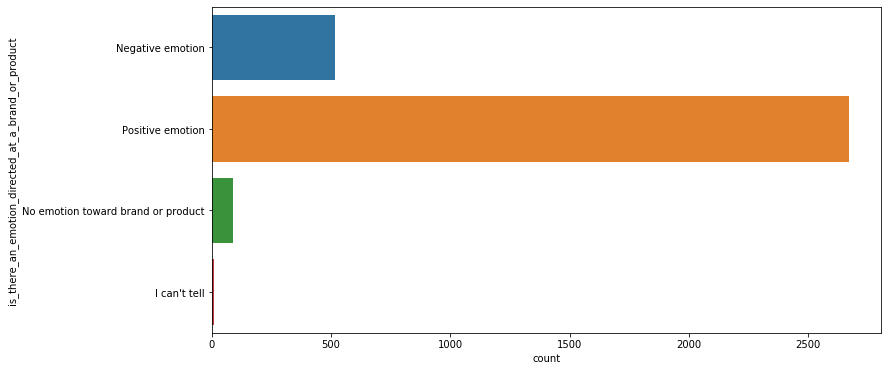

In [133]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
import seaborn as sns
sns.countplot(y=df['is_there_an_emotion_directed_at_a_brand_or_product'],data=df)

In [134]:
print("Filtering out to keep only the positive & negative emotion..")
emotions = ['Positive emotion','Negative emotion']
tw_df = df[df['is_there_an_emotion_directed_at_a_brand_or_product'].isin(emotions)]
show = pro_gress()

Filtering out to keep only the positive & negative emotion..


Processing: 100% |=============================================| Time:  0:00:01


Done!!


In [135]:
print("Checking the shape==>",tw_df.shape)

Checking the shape==> (3191, 3)


In [138]:
print("Confirming the filter process result..",tw_df.is_there_an_emotion_directed_at_a_brand_or_product.unique(),"seems we've what we wanted!!")

Confirming the filter process result.. ['Negative emotion' 'Positive emotion'] seems we've what we wanted!!


In [137]:
tw_df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 have a 3 ihone fter 3 hrs tweeting a...,iPhone,Negative emotion
1,jessedee now about fludapp wesome iadihone ap...,iPad or iPhone App,Positive emotion
2,swonderlin an not wait for #iad 2 also hey sho...,iPad,Positive emotion
3,sxsw hope this years festival isnt as crashy ...,iPad or iPhone App,Negative emotion
4,sxtxstate great stuff on ri # arissa ayer oogl...,Google,Positive emotion
...,...,...,...
9077,mention your guy just convinced me to switch ...,iPhone,Positive emotion
9079,quotpapyrussort of like the ipadquot nice ol ...,iPad,Positive emotion
9080,iller says oogle quotmight be run over by the...,Other Google product or service,Negative emotion
9085,ve always used amera+ for my ihone bc it has a...,iPad or iPhone App,Positive emotion


## Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

In [139]:
print("Changing positive & negative emotion to 1 & 0 respectively..")
tw_df.is_there_an_emotion_directed_at_a_brand_or_product = tw_df.is_there_an_emotion_directed_at_a_brand_or_product.map({'Positive emotion':1,'Negative emotion':0})
show=pro_gress()

Changing positive & negative emotion to 1 & 0 respectively..


Processing: 100% |=============================================| Time:  0:00:01


Done!!


In [142]:
print(tw_df.is_there_an_emotion_directed_at_a_brand_or_product.value_counts())
print("So the emotions have been changed successfully to 1 & 0.")

1    2672
0     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64
So the emotions have been changed successfully to 1 & 0.


## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

In [143]:
print("Setting feature & labels.")
X = tw_df.tweet_text
y = tw_df.is_there_an_emotion_directed_at_a_brand_or_product

Setting feature & labels.


### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [144]:
print("Splitting in train & test set..")
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
show=pro_gress()

Splitting in train & test set..


Processing: 100% |=============================================| Time:  0:00:01


Done!!


In [145]:
print("The shape of X_train is==>",X_train.shape)
print("The shape of X_test is==>",X_test.shape)
print("The shape of y_train is==>",y_train.shape)
print("The shape of y_test is==>",y_test.shape)

The shape of X_train is==> (2393,)
The shape of X_test is==> (798,)
The shape of y_train is==> (2393,)
The shape of y_test is==> (798,)


## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

In [146]:
print("Importing CountVectorizer & setting the required parameters..")
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(stop_words='english',ngram_range=(1,2),min_df=2)
show=pro_gress()
print("\nTransforming the train & test features into document-term matrix..")
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)
show=pro_gress()

Importing CountVectorizer & setting the required parameters..


Processing: 100% |=============================================| Time:  0:00:01


Done!!

Transforming the train & test features into document-term matrix..


Processing: 100% |=============================================| Time:  0:00:01


Done!!


## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

In [148]:
print("Initializing Logistic Regression model..")
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
show = pro_gress()

Initializing Logistic Regression model..


Processing: 100% |=============================================| Time:  0:00:01


Done!!


### Fit the classifer
- fit logistic regression classifier

In [150]:
print("Fitting the model..\n", logreg.fit(X_train,y_train))

Fitting the model..
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

In [151]:
print("Initializing Naive bayes model..")
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
show = pro_gress()

Initializing Naive bayes model..


Processing: 100% |=============================================| Time:  0:00:01


Done!!


### Fit the classifer
- fit naive bayes classifier

In [152]:
print("Fitting the model..\n",nb.fit(X_train,y_train))

Fitting the model..
 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

In [153]:
print("Making predictions based on logistic model..")
y_pred = logreg.predict(X_test)
show = pro_gress()

Making predictions based on logistic model..


Processing: 100% |=============================================| Time:  0:00:01


Done!!


### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

In [154]:
print("Making predictions based on naive bayes model..")
y_pred1 = nb.predict(X_test)
show = pro_gress()

Making predictions based on naive bayes model..


Processing: 100% |=============================================| Time:  0:00:01


Done!!


## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [155]:
from sklearn.metrics import accuracy_score,classification_report
acc1 = accuracy_score(y_test,y_pred)
report1=classification_report(y_test,y_pred)
print("This is the obtained accuracy {}%".format(acc1*100))
print("This is the report with the detailed scoring of F1 scores,precision & accuracy:-")
print(report1)

This is the obtained accuracy 88.09523809523809%
This is the report with the detailed scoring of F1 scores,precision & accuracy:-
              precision    recall  f1-score   support

           0       0.79      0.36      0.49       129
           1       0.89      0.98      0.93       669

    accuracy                           0.88       798
   macro avg       0.84      0.67      0.71       798
weighted avg       0.87      0.88      0.86       798



### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score

In [156]:
from sklearn.metrics import accuracy_score,classification_report
acc2 = accuracy_score(y_test,y_pred1)
report2=classification_report(y_test,y_pred1)
print("This is the obtained accuracy {}%".format(acc2*100))
print("This is the report with the detailed scoring of F1 scores,precision & accuracy:-")
print(report2)

This is the obtained accuracy 87.468671679198%
This is the report with the detailed scoring of F1 scores,precision & accuracy:-
              precision    recall  f1-score   support

           0       0.76      0.33      0.46       129
           1       0.88      0.98      0.93       669

    accuracy                           0.87       798
   macro avg       0.82      0.65      0.69       798
weighted avg       0.86      0.87      0.85       798

